# DA1 Sales Analysis📊

First, let's import our Data.The issue with that is, that the Data for one year of sales is split up into 12 different `.csv` files which we have to read in and combine to make most sense of our dataframe.

In [1]:
import os
import pandas as pd

In [2]:

# Define the path to the directory containing the CSV files
path = "D:\\Desktop\\SalesData Project"

# List all files in the directory, ignoring hidden files
files = [file for file in os.listdir(path) if not file.startswith('.')]

# Initialize an empty DataFrame to store all the data
all_months_data = pd.DataFrame()

# Iterate over the list of files and read each CSV file
for file in files:
    current_data = pd.read_csv(os.path.join(path, file))
    all_months_data = pd.concat([all_months_data, current_data])

# Save the concatenated data to a new CSV file
all_months_data.to_csv("all_data.csv", index=False)

# Read the concatenated data from the saved CSV file
all_data = pd.read_csv("all_data.csv")

# Display the first few rows of the DataFrame
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Cleaning the Data

In [3]:
df = all_data
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.shape

(186850, 6)

In [5]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
df = df.dropna().reset_index(drop=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


## Adding a month column

In [9]:
order_date = df.loc[517, 'Order Date']
print(order_date)



Order Date


It seems like the value for Row 517 contains the String 'Order Date' instead of a fitting value! This issue seems to occure even more often than just once in this df so let's find a method to get rid of these corrupted rows!

In [10]:
df.shape

(186305, 6)

In [11]:
df = df[df['Order Date'].str[0:2]!='Or']
df.shape

(185950, 6)

Now we should be able to parse our `'Order Date'` column into datetime and extract the month for our purposes!

In [12]:
import warnings
warnings.filterwarnings('ignore')

df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [13]:
df['Month'].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10])

## Q1 Which month brought the highest value of sales?

Let's first convert the object columns to numeric columns so we can perform further calculations!

In [14]:
df['Price Each'] = df['Price Each'].astype('float')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186304
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 9.9+ MB


In [15]:
df['Sale Value'] = df['Price Each'] * df['Quantity Ordered']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Value
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186301,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186302,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [31]:
grouped_sales = df[['Month','Quantity Ordered','Sale Value']].groupby('Month').sum()
grouped_sales = grouped_sales.sort_values(by='Sale Value', ascending=False)
grouped_sales

,Quantity Ordered,Sale Value
Month,,
12,28114,4613443.34
10,22703,3736726.88
4,20558,3390670.24
11,19798,3199603.20
5,18667,3152606.75
3,17005,2807100.38
7,16072,2647775.76
6,15253,2577802.26
8,13448,2244467.88


Text(0.5, 1.0, 'Sale Value per Month')

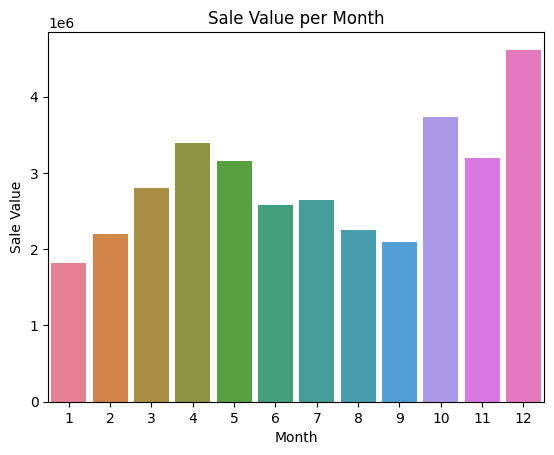

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(grouped_sales, x='Month', y='Sale Value', palette = 'husl', width = 0.85)
plt.title('Sale Value per Month')

Not too far from what could be expected.Sales peak around Christmas time!🎅🏼

## Q2 What city created the highest Sales Value?

In [38]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Value
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


First he have to create a `City` column, which will make things easier for us in the long run!

In [40]:
df['City'] = df['Purchase Address'].str.split(',').str[1]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Value,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [42]:
grouped_cities = df[['Quantity Ordered', 'Sale Value', 'City']].groupby('City').sum()
grouped_cities

,Quantity Ordered,Sale Value
City,,
Atlanta,16602,2795498.58
Austin,11153,1819581.75
Boston,22528,3661642.01
Dallas,16730,2767975.40
Los Angeles,33289,5452570.80
New York City,27932,4664317.43
Portland,14053,2320490.61
San Francisco,50239,8262203.91
Seattle,16553,2747755.48


Text(0.5, 1.0, 'Sale Value per City')

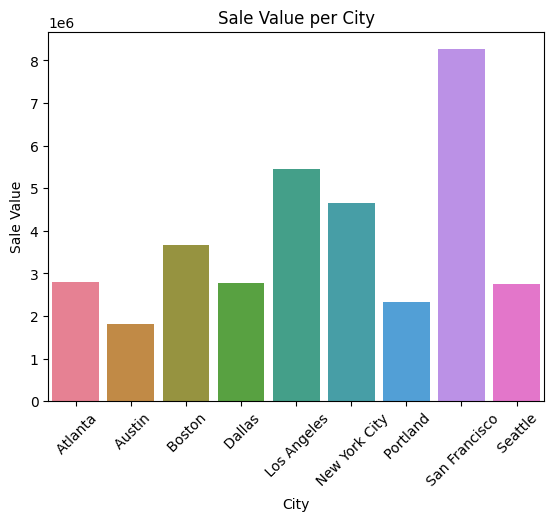

In [45]:
sns.barplot(grouped_cities, x='City', y='Sale Value', palette = 'husl', width = 0.85)
plt.xticks(rotation=45)
plt.title('Sale Value per City')

We can see that the most value in sales got brought in by San Francisco!

## Q3 What time should we display advertisements to maximize likelihood of customer's buying product?

To get an answer to this question we should look at the exact time when things got ordered, so lets create a new column for the time of when the order got placed.

In [46]:
df['Order Time Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Value,City,Order Time Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
186301,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
186302,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [50]:
# per order regardless of the quantity we count the order as one 
df['Count'] = 1
df.head()
order_time = df[['Order Time Hour', 'Count']]
order_time

,Order Time Hour,Count
0,8,1
1,22,1
2,14,1
3,14,1
4,9,1
...,...,...
186300,20,1
186301,16,1
186302,7,1
186303,17,1


In [57]:
order_time_grp = order_time.groupby('Order Time Hour').sum()
order_time_grp = order_time_grp.sort_values( 'Count', ascending = False)
order_time_grp

,Count
Order Time Hour,
19,12905
12,12587
11,12411
18,12280
20,12228
13,12129
14,10984
10,10944
21,10921


Text(0.5, 1.0, 'Orders per Time')

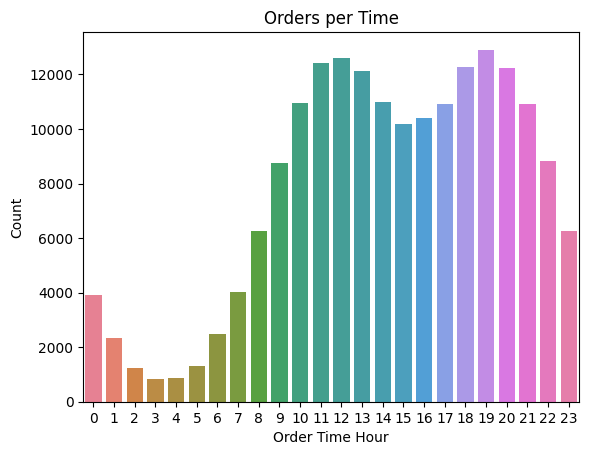

In [73]:
sns.barplot(order_time_grp, x = 'Order Time Hour', y = 'Count', palette = 'husl')
plt.title('Orders per Time')



Slightly before 11am or 7pm sounds like a great time to place more ads and drive sales!

## Q4 What products are most often sold together?

In [74]:
from itertools import combinations
from collections import Counter


In [75]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df_grp = df[df['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df_grp['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df_grp[['Order ID', 'Grouped']].drop_duplicates()
df2

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186237,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186239,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186247,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186259,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [76]:
#split the rows then update the counter to count all combinations of pairs in the split lists (.., 2)
# we define key, val in the most common counter list which the counter creates and print them out
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Q5 What product sold the most? 

In [77]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Value,City,Order Time Hour,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,1
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,1
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,1
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,1
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,1


In [82]:
best_products = df[['Product', 'Quantity Ordered']].groupby('Product').sum()
best_products_sorted = best_products.sort_values(by='Quantity Ordered', ascending=False)
best_products_sorted

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


Text(0.5, 1.0, 'Total Quantity Ordered for Each Product')

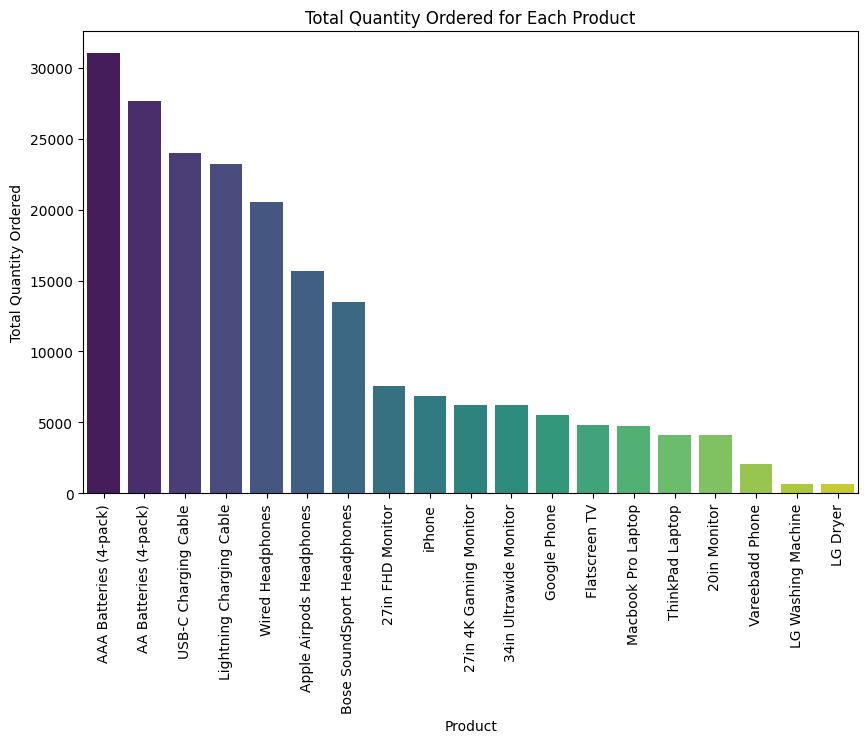

In [85]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=best_products_sorted.index, y='Quantity Ordered', data=best_products_sorted, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.title('Total Quantity Ordered for Each Product')

And just like that, we are done!👋🏻